In [1]:
import time
from DynSystem import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
def Lorenz(y, t):
     rho = 28.0
     sigma = 10.0
     beta = 8.0 / 3.0
     
     dy = [sigma*(y[1] - y[0]),
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
     return np.array(dy)

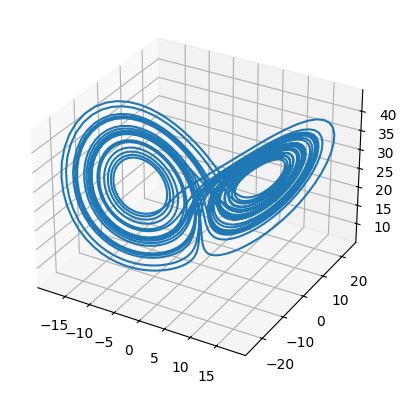

In [3]:
#compute Lorentz attractor shape
dt = 0.01
duration = 30
L = int(duration / dt)
yin = np.array([-8, 8, 27])
shape = np.zeros((3, L))
for step in range(L):
  tstep = step * dt
  yout = odeRK4(Lorenz, yin, tstep, dt)
  yin = yout
  shape[:, step] = yout

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(shape[0], shape[1], shape[2])
plt.show()

In [4]:
# define initial conditions
y0 = [-8, 8, 27]
n = 3
lim = 0.1
xvec = np.linspace(-lim, lim, n)
yvec = np.linspace(-lim, lim, n)
zvec = np.linspace(-lim, lim, n)

[x0, y0, z0] = np.meshgrid(xvec + y0[0], yvec + y0[1], zvec + y0[2])
yIC = np.zeros((3, n**3))
yIC[0, :] = x0.reshape(n**3)
yIC[1, :] = y0.reshape(n**3)
yIC[2, :] = z0.reshape(n**3)

# compute trajectory for every initial condition
dt = 0.01
duration = 5
L = int(duration / dt)
yin = yIC
y_single_steps = np.zeros((3, L, n**3))

start = time.time()
for step in range(L):
  tstep = step * dt
  yout = odeRK4(Lorenz, yin, tstep, dt)
  yin = yout
  y_single_steps[:, step, :] = yout
end = time.time()
print(f'Total time elapsed: {(end - start):.3f} s')

Total time elapsed: 0.044 s


In [8]:
y_single_steps[:, 0, :]

array([[-6.58678481, -6.58642275, -6.5860607 , -6.49622064, -6.4958632 ,
        -6.49550576, -6.4056567 , -6.40530388, -6.40495106, -6.57732279,
        -6.57696089, -6.57659899, -6.4867584 , -6.48640112, -6.48604383,
        -6.39619425, -6.39584158, -6.39548892, -6.56786076, -6.56749901,
        -6.56713727, -6.47729615, -6.47693902, -6.47658189, -6.38673178,
        -6.38637926, -6.38602675],
       [ 7.69532084,  7.70251502,  7.70970896,  7.69722971,  7.70433062,
         7.7114313 ,  7.69913163,  7.70613927,  7.71314668,  7.79416474,
         7.80135422,  7.80854346,  7.79608007,  7.80317629,  7.81027227,
         7.79798837,  7.80499131,  7.81199402,  7.89300933,  7.90019411,
         7.90737865,  7.89493111,  7.90202263,  7.9091139 ,  7.89684577,
         7.90384401,  7.91084202],
       [25.62784941, 25.72496468, 25.82207998, 25.63512121, 25.73224315,
        25.8293651 , 25.64239471, 25.73952322, 25.83665175, 25.62103563,
        25.71815137, 25.81526713, 25.62840073, 25.7255

In [5]:
def update(num, y_single_steps, lines):
  for i in range(n ** 3):
    lines[i][0].set_data(y_single_steps[:2, :num, i])
    lines[i][0].set_3d_properties(y_single_steps[2, :num, i])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


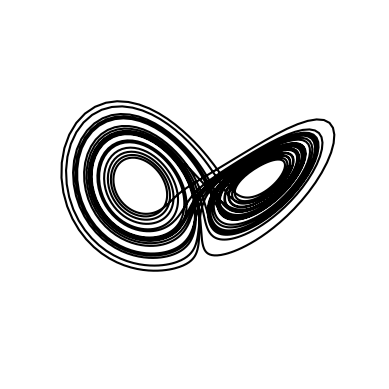

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('black')
ax.axis('off')
ax.plot(shape[0], shape[1], shape[2], color='white')

lines = []
# i-th line contains plot for i-th initial condition 
for i in range(n ** 3):
  lines.append(ax.plot(y_single_steps[0, 0:1, i],
                       y_single_steps[1, 0:1, i],
                       y_single_steps[2, 0:1, i], 
                       color='red', lw=0.5))


# ax.set_xlim(-30, 30)
# ax.set_ylim(-30, 30)
# ax.set_zlim(-10, 40)
ani = animation.FuncAnimation(fig, update, 
                              fargs=(y_single_steps, lines), # args passed to the function update (the first is frame # by default)
                              frames=range(0, L, 5),
                              interval=80, blit=False)

ani.save('lorenz_attractor.gif', writer='pillow')